In [26]:
import numpy as np
import pandas as pd

In [4]:
x = np.random.beta(1, 1, size = 50)
y = np.random.beta(1, 1, size = 50)

In [5]:
x

array([0.18935829, 0.75771379, 0.30459473, 0.84582493, 0.82501909,
       0.95880502, 0.6712951 , 0.46253262, 0.22270936, 0.25676643,
       0.25491605, 0.98974408, 0.34838125, 0.97894689, 0.64150812,
       0.06078341, 0.21783444, 0.37281363, 0.81719411, 0.07779642,
       0.36129302, 0.38211139, 0.17987869, 0.60655247, 0.52631751,
       0.08791019, 0.27674728, 0.94127488, 0.35802002, 0.80538484,
       0.14920672, 0.17105138, 0.40324521, 0.02962096, 0.43437066,
       0.83337614, 0.93682346, 0.78055825, 0.57613057, 0.62016556,
       0.42968168, 0.61083168, 0.87289572, 0.71909768, 0.30377063,
       0.44830386, 0.68640212, 0.20585259, 0.57415023, 0.27291608])

In [25]:
y

array([0.53461851, 0.35845833, 0.44483786, 0.66641301, 0.18222403,
       0.59550512, 0.42397451, 0.45564096, 0.14670181, 0.33958661,
       0.36780015, 0.38538742, 0.83329541, 0.61534006, 0.54180661,
       0.34706457, 0.55285114, 0.88341289, 0.11300299, 0.44947626,
       0.26324888, 0.55697421, 0.81071083, 0.52370635, 0.11113576,
       0.17079799, 0.6841145 , 0.77628295, 0.2537838 , 0.17206336,
       0.17255804, 0.87682373, 0.43125718, 0.054377  , 0.94709557,
       0.81271225, 0.44981211, 0.60909562, 0.33425713, 0.8342836 ,
       0.20317191, 0.8157768 , 0.10296728, 0.67182097, 0.8066277 ,
       0.18846493, 0.26376728, 0.41220972, 0.44736269, 0.82771211])

### 2. Create a vector you will call true_label of size n = 50 which will contain the true labels: “orange” or “blue”
• “orange” if x + y ≥ 1

• “blue” otherwise.

In [11]:
true_label = np.where((x + y) > 1, "orange", "blue")

### 3. Create a new point (x0, y0) at which you will try to assign a label, depending on the values of the nearest neighbors. For example: (x0 = 0.75, y0 = 0.5).

In [13]:
x0 = 0.75
y0 = 0.5

### 4. Create a matrix with 3 columns: the x and y coordinates of your generated points, and the assigned label.

In [16]:
matrix = np.array([x, y, true_label])
matrix

array([['0.1893582918177032', '0.7577137949926249', '0.3045947338086477',
        '0.8458249254955648', '0.8250190862793562', '0.9588050153176364',
        '0.671295099556518', '0.4625326170825891', '0.22270936051756612',
        '0.2567664280856801', '0.2549160492022016', '0.9897440751491613',
        '0.34838124871173887', '0.9789468914130917', '0.641508121336939',
        '0.0607834146723655', '0.21783444288973022',
        '0.37281362828438375', '0.8171941056414397',
        '0.07779642007701346', '0.36129302113358325',
        '0.38211138743407325', '0.17987868730475434',
        '0.606552468883764', '0.5263175144962358', '0.08791019429326977',
        '0.27674728160949574', '0.9412748758492737',
        '0.35802001503248704', '0.805384838190344',
        '0.14920672315982725', '0.17105138062954472',
        '0.4032452100858804', '0.029620957370059542',
        '0.4343706555881594', '0.8333761376836827', '0.9368234625976269',
        '0.7805582451011411', '0.5761305711810252', '0.

In [31]:
df = pd.DataFrame({"x":x, "y":y, "True_label":true_label})

In [32]:
df


,x,y,True_label
0,0.189358,0.534619,blue
1,0.757714,0.358458,orange
2,0.304595,0.444838,blue
3,0.845825,0.666413,orange
4,0.825019,0.182224,orange
5,0.958805,0.595505,orange
6,0.671295,0.423975,orange
7,0.462533,0.455641,blue
8,0.222709,0.146702,blue
9,0.256766,0.339587,blue


### 5. Plot your 50 observations on a scatter plot and add the new (x0, y0) observation using a different color/shape.

In [21]:
import matplotlib.pyplot as plt

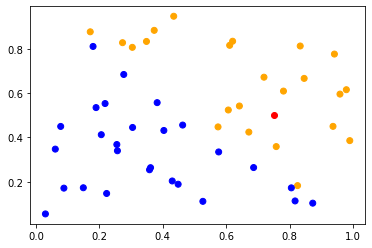

In [34]:
plt.scatter(df.x, df.y, c= df.True_label)
plt.scatter(x0, y0, color = "red")

## 3 The algorithm

### 1. To know which are the K closests points of your new observation, you need to compute the distance between each point of your dataset and your new observation. To that end, create a function that computes the distances between two points: